In [2]:
import os, sys
import warnings
warnings.filterwarnings('ignore')
from fish_proc.wholeBrainDask.cellProcessing_single_WS import *
from fish_proc.utils.fileio import make_tarfile
import dask.array as da
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

df = pd.read_csv('data_list.csv')
dask_tmp = '/nrs/ahrens/Ziqiang/dask-worker-space'
memory_limit = 0 # unlimited

row = df.iloc[5]
save_root = row['save_dir']+'/'
print(save_root)

/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20191130/fish00/6dpf_HuC-GC7FF_GU-fwd_fish00_exp02_20191130_151303//


In [2]:
Y_d = da.from_zarr(f'{save_root}/Y_max.zarr')
np.save(f'{save_root}/Y_max', Y_d.compute())
Y_d = da.from_zarr(f'{save_root}/Y_d_max.zarr')
np.save(f'{save_root}/Y_d_max', Y_d.compute())

Y_d = da.from_zarr(f'{save_root}/Y_ave.zarr')
chunks = Y_d.chunksize[:-1]
np.save(f'{save_root}/Y_ave', Y_d.compute())
Y_d = np.load(f'{save_root}/Y_ave.npy')
Y_d_max = Y_d.max(axis=0, keepdims=True)

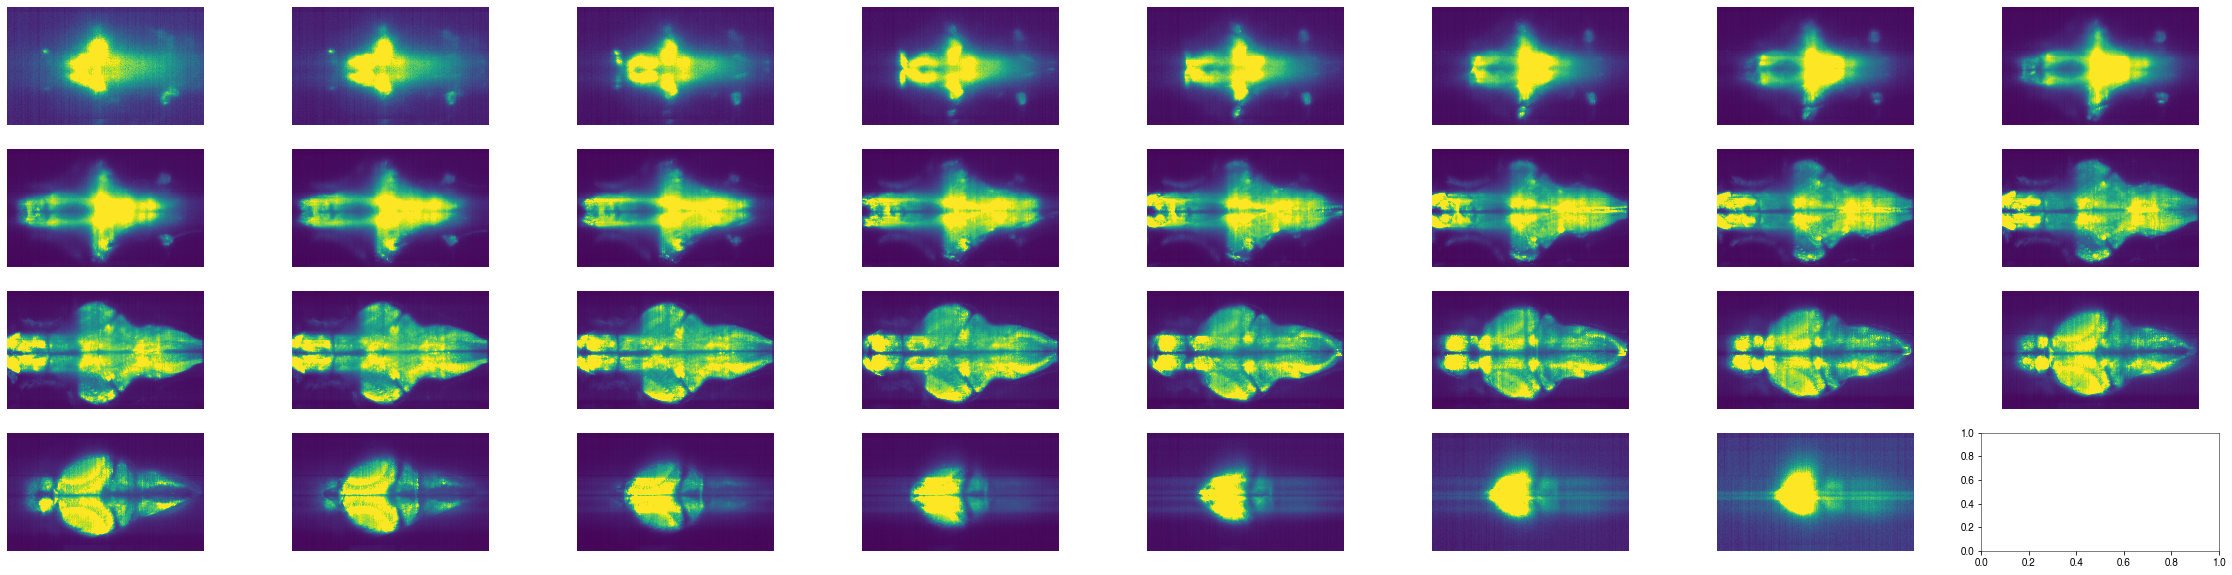

In [4]:
num_plane = Y_d.shape[0]
fig, ax = plt.subplots(4, num_plane//4+1, figsize=(40, 10))
ax = ax.flatten()
for n, _ in enumerate(Y_d):
    ax[n].imshow(_.squeeze().astype('float'), vmax=np.percentile(_[:].astype('float'), 95))
    ax[n].axis('off')
plt.show()

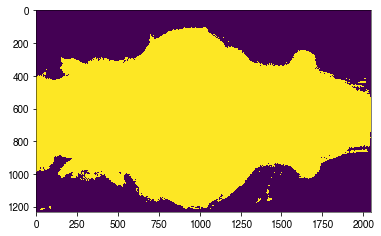

In [5]:
max_ = np.percentile(Y_d_max, 40)
mask_ = Y_d_max>max_
mask_ = np.repeat(mask_, Y_d.shape[0], axis=0)
mask_ = da.from_array(mask_, chunks=(1, chunks[1], chunks[2], -1))
plt.imshow(mask_[0].squeeze())
plt.show()

In [3]:
print('========================')
print('DF/F computation')
# compute_cell_dff_raw(save_root, mask_, dask_tmp=dask_tmp, memory_limit=0)
combine_dff(save_root)
combine_dff_sparse(save_root)

DF/F computation


100%|██████████| 51103/51103 [17:43<00:00, 48.05it/s]


In [4]:
# make_tarfile(save_root+'sup_demix_rlt.tar.gz', save_root+'sup_demix_rlt')

In [5]:
import shutil
for nfolder in glob(save_root+'*.zarr/'):
    shutil.rmtree(nfolder)
shutil.rmtree(save_root+'cell_raw_dff')
shutil.rmtree(save_root+'sup_demix_rlt')

FileNotFoundError: [Errno 2] No such file or directory: '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20191130/fish00/6dpf_HuC-GC7FF_GU-fwd_fish00_exp02_20191130_151303//sup_demix_rlt'